In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv('salarydata.csv')
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [4]:
data.duplicated().sum()

3465

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [7]:
data.shape

(29096, 14)

In [8]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,29096.000000,29096.000000,29096.000000,29096.000000,29096.000000
mean,39.251340,10.102695,1197.802206,97.175179,40.637820
std,13.687157,2.645194,7778.225220,424.008232,12.735418
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


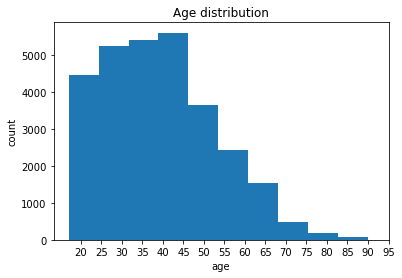

In [9]:
plt.hist(data['age'])
plt.xlabel('age')
plt.ylabel('count')
plt.xticks(np.arange(20,100,5))
plt.title('Age distribution')
plt.show()

In [10]:
#DATA CLEANING
data.isin(['?']).sum(axis=0)

age                  0
workclass         1632
education            0
education-num        0
marital-status       0
occupation        1639
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     580
salary               0
dtype: int64

In [11]:
# code will replace the special character to nan and then drop the columns 
data['native-country'] = data['native-country'].replace('?',np.nan)
data['workclass'] = data['workclass'].replace('?',np.nan)
data['occupation'] = data['occupation'].replace('?',np.nan)
#dropping the NaN rows now 
data.dropna(how='any',inplace=True)

In [12]:
#find categorical variables

categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'salary']


In [13]:
data[categorical].head()


,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [14]:
data[categorical].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
salary            0
dtype: int64

In [15]:
categorical = [var for var in data.columns if data[var].dtype=='O']
for v in categorical:
    print(data[v].value_counts())

Private             19214
Self-emp-not-inc     2431
Local-gov            2014
State-gov            1253
Self-emp-inc         1049
Federal-gov           929
Without-pay            14
Name: workclass, dtype: int64
HS-grad         8268
Some-college    5894
Bachelors       4503
Masters         1558
Assoc-voc       1256
Assoc-acdm       994
11th             941
10th             770
7th-8th          541
Prof-school      532
9th              449
Doctorate        364
12th             358
5th-6th          283
1st-4th          149
Preschool         44
Name: education, dtype: int64
Married-civ-spouse       12371
Never-married             8388
Divorced                  4009
Separated                  928
Widowed                    817
Married-spouse-absent      370
Married-AF-spouse           21
Name: marital-status, dtype: int64
Prof-specialty       3783
Exec-managerial      3646
Adm-clerical         3291
Craft-repair         3229
Sales                3205
Other-service        2914
Machine-op-ins

In [16]:
data.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Transport-moving',
       'Farming-fishing', 'Machine-op-inspct', 'Tech-support',
       'Craft-repair', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [17]:
data.occupation.value_counts()

Prof-specialty       3783
Exec-managerial      3646
Adm-clerical         3291
Craft-repair         3229
Sales                3205
Other-service        2914
Machine-op-inspct    1666
Transport-moving     1420
Handlers-cleaners    1159
Farming-fishing       957
Tech-support          858
Protective-serv       626
Priv-house-serv       141
Armed-Forces            9
Name: occupation, dtype: int64

In [18]:
data['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Poland', 'Columbia', 'Cambodia', 'Thailand',
       'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'Italy', 'China', 'South', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [19]:
data['native-country'].value_counts()

United-States                 24259
Mexico                          600
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        61
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France                      

In [20]:

numerical = [var for var in data.columns if data[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 5 numerical variables

The numerical variables are :

 ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [21]:
data[numerical].head()

,age,education-num,capital-gain,capital-loss,hours-per-week
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [22]:
data[numerical].isnull().sum()

age               0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

In [23]:
#DATA VISUALISATIONS

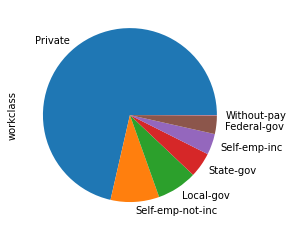

In [24]:
data['workclass'].value_counts().plot(kind='pie')
plt.show()

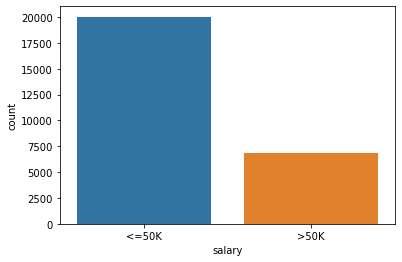

In [25]:
import seaborn as sns
sns.countplot(x='salary',data=data)  
plt.show() 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Adm-clerical'),
  Text(1, 0, 'Exec-managerial'),
  Text(2, 0, 'Handlers-cleaners'),
  Text(3, 0, 'Prof-specialty'),
  Text(4, 0, 'Other-service'),
  Text(5, 0, 'Sales'),
  Text(6, 0, 'Transport-moving'),
  Text(7, 0, 'Farming-fishing'),
  Text(8, 0, 'Machine-op-inspct'),
  Text(9, 0, 'Tech-support'),
  Text(10, 0, 'Craft-repair'),
  Text(11, 0, 'Protective-serv'),
  Text(12, 0, 'Armed-Forces'),
  Text(13, 0, 'Priv-house-serv')])

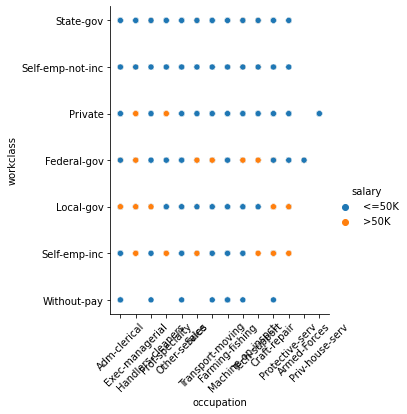

In [26]:
sns.relplot(x= 'occupation', y ='workclass', hue='salary',data = data)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='education'>

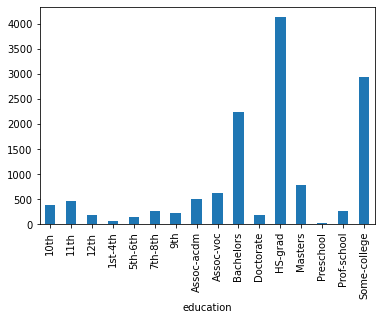

In [27]:
pd.crosstab(data['salary'],data['education']).mean().plot(kind='bar')

<AxesSubplot:xlabel='occupation'>

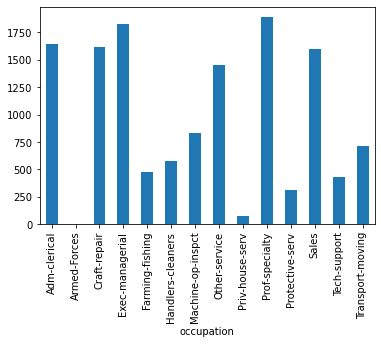

In [28]:
pd.crosstab(data['salary'],data['occupation']).mean().plot(kind='bar')

<AxesSubplot:xlabel='workclass'>

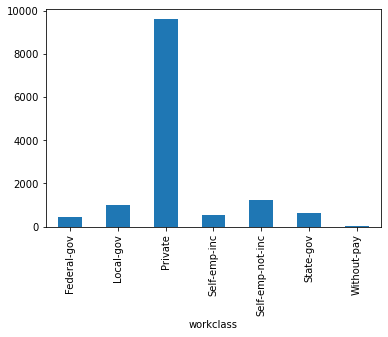

In [29]:
pd.crosstab(data['salary'],data['workclass']).mean().plot(kind='bar')

<AxesSubplot:xlabel='sex'>

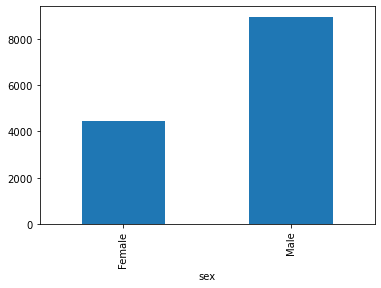

In [30]:
pd.crosstab(data['salary'],data['sex']).mean().plot(kind='bar')

<AxesSubplot:xlabel='relationship'>

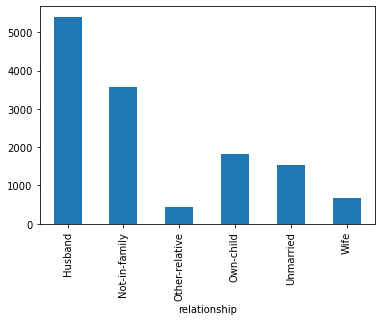

In [31]:
pd.crosstab(data['salary'],data['relationship']).mean().plot(kind='bar')

In [32]:
data.corr()

,age,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,0.038049,0.077238,0.052562,0.072530
education-num,0.038049,1.000000,0.126085,0.079979,0.145491
capital-gain,0.077238,0.126085,1.000000,-0.036035,0.079403
capital-loss,0.052562,0.079979,-0.036035,1.000000,0.049053
hours-per-week,0.072530,0.145491,0.079403,0.049053,1.000000


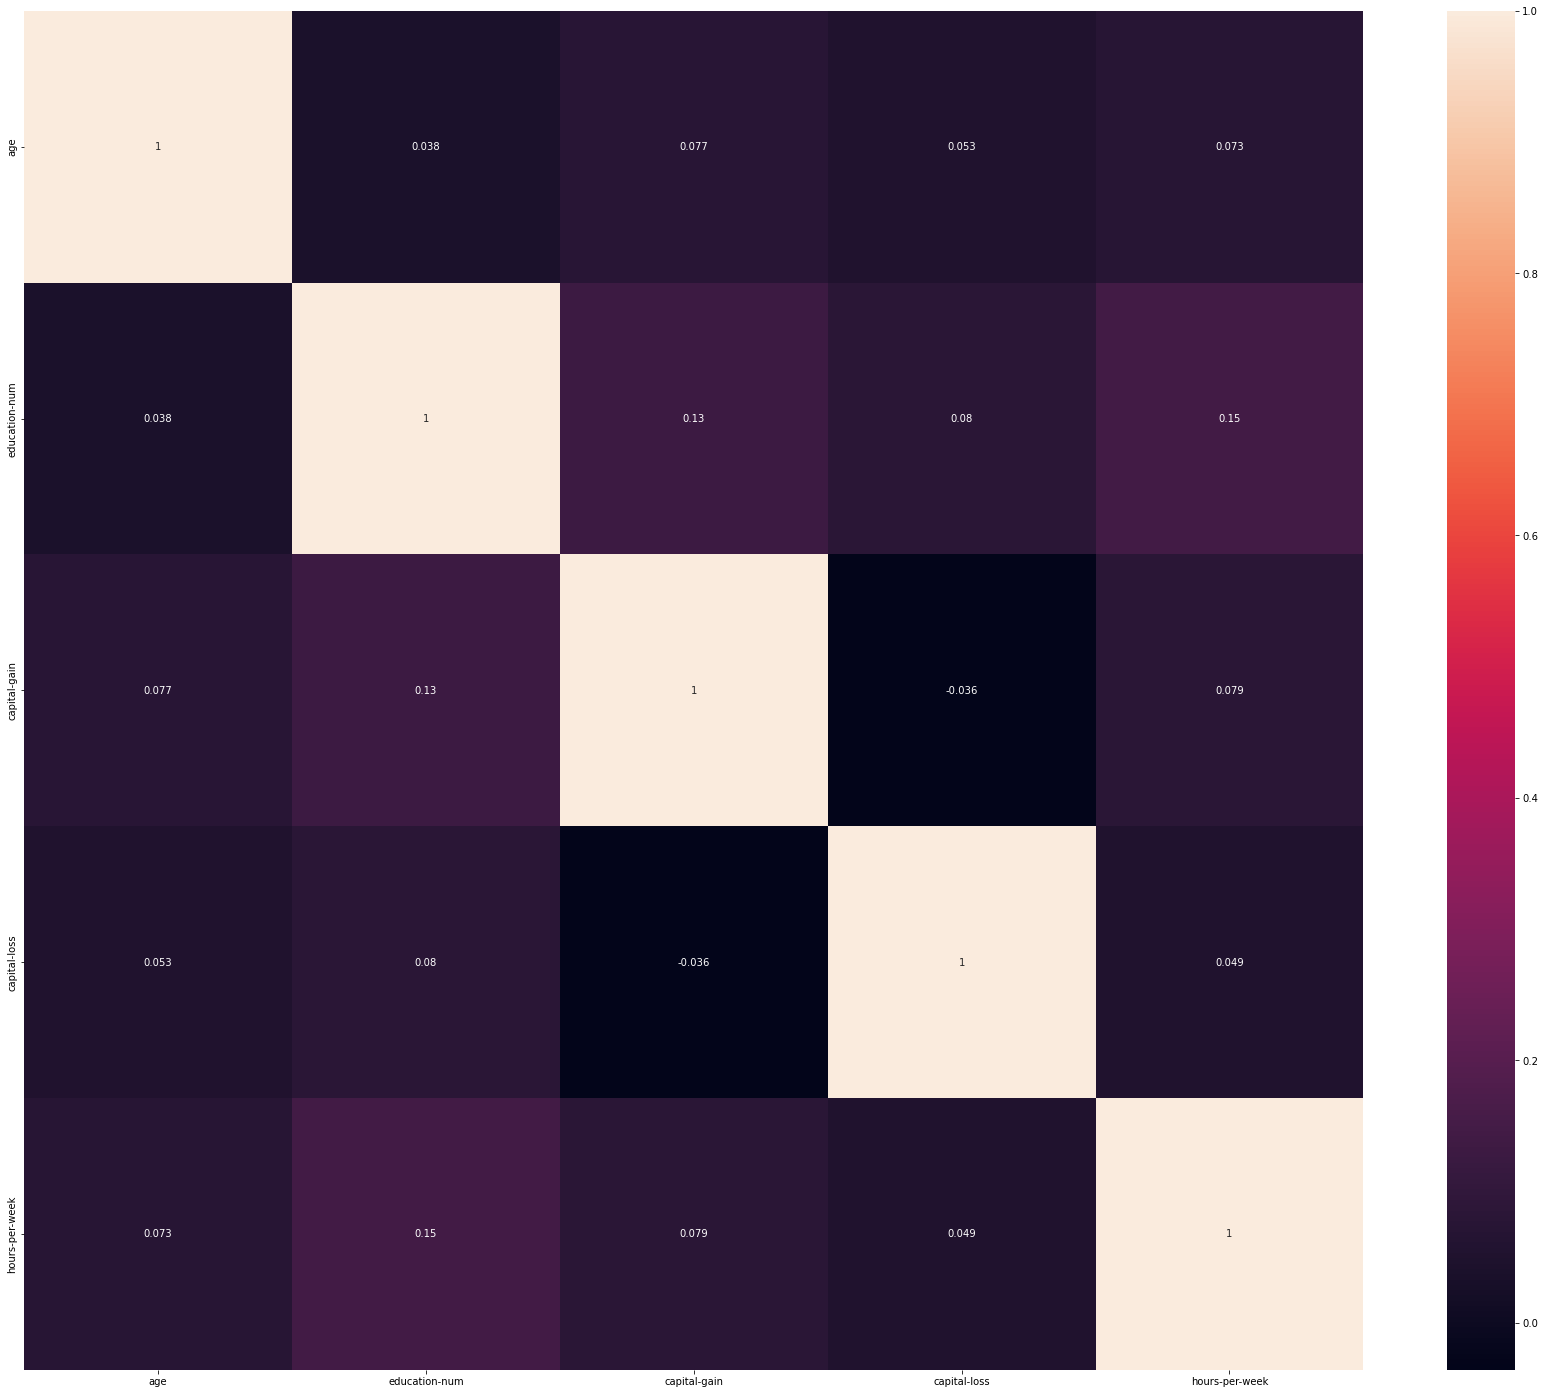

In [33]:
#Correlation plot
import matplotlib.pyplot as plt
plt.figure(figsize=(30,25) )
sns.heatmap(data.corr(),annot=True)
plt.show()

In [34]:
#IMPORT LABEL ENCODER
from sklearn.preprocessing import LabelEncoder
#LABEL_ENCODER KNOWS HOW TO UNDERSTAND WORD LABELS
le=LabelEncoder()
for i in categorical:
    data[i]=le.fit_transform(data[i])

In [35]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [36]:
#VECTOR AND TARGET VARIABLE
x=data.drop(['salary'],axis=1)
y=data['salary']

In [37]:
#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


In [38]:
x_train.shape,x_test.shape

((18832, 13), (8072, 13))

In [39]:
x_test.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [40]:
x_train.dtypes

age               int64
workclass         int32
education         int32
education-num     int64
marital-status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int32
dtype: object

In [41]:
x_test.dtypes

age               int64
workclass         int32
education         int32
education-num     int64
marital-status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int32
dtype: object

In [42]:
x_test.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [43]:
x_train['workclass'].value_counts()

2    13479
4     1715
1     1370
5      867
3      721
0      668
6       12
Name: workclass, dtype: int64

In [44]:
new_cols=['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country']

In [45]:
data['workclass'].value_counts()

2    19214
4     2431
1     2014
5     1253
3     1049
0      929
6       14
Name: workclass, dtype: int64

In [46]:
#FEATURE SCALING

In [47]:
from sklearn.preprocessing import RobustScaler
sc=RobustScaler()
x_train.loc[:,new_cols]=sc.fit_transform(x_train[new_cols])
x_test.loc[:,new_cols]=sc.fit_transform(x_test[new_cols])

In [48]:
x_train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
29139,0.10,2.0,0.000000,-0.25,0.0,-0.333333,-0.333333,0.0,0.0,0.0,0.0,6.0,0.0
27726,-0.70,0.0,0.000000,-0.25,0.0,0.833333,-0.333333,0.0,0.0,0.0,0.0,1.6,0.0
17813,-0.35,0.0,0.000000,-0.25,0.0,1.166667,1.333333,0.0,-1.0,5178.0,0.0,-1.0,0.0
16453,0.60,0.0,0.000000,-0.25,0.0,0.833333,1.333333,0.0,-1.0,0.0,0.0,-5.0,0.0
7358,-0.45,0.0,-0.666667,0.75,1.0,-1.000000,0.666667,0.0,-1.0,0.0,0.0,0.0,-7.0


In [ ]:
#Sampling using RandomOverSampler

In [97]:
round(y.value_counts(normalize=True)*100,2).astype('str')+'%'

0    74.43%
1    25.57%
Name: salary, dtype: object

In [100]:
from imblearn.over_sampling import RandomOverSampler
RandomOverSampler
ros=RandomOverSampler(random_state=42)
ros.fit(x,y)
x_resampled,y_resampled=ros.fit_resample(x,y)
round(y_resampled.value_counts(normalize=True)*100,2).astype('str')+'%'

0    50.0%
1    50.0%
Name: salary, dtype: object

In [102]:
#MODEL TRAINING
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr=lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [103]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,recall_score
accuracy_score(y_test,y_pred)

0.8076065411298315

In [104]:
recall_score(y_test,y_pred)

0.4265129682997118

In [105]:
precision_score(y_test,y_pred)

0.7121090617481957

In [106]:
f1_score(y_test,y_pred)

0.5334935416040852

In [107]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
knny_pred=knn.predict(x_test)

In [108]:
accuracy_score(y_test,knny_pred.round())

0.8358523290386521

In [109]:
recall_score(y_test,knny_pred.round())

0.6268011527377522

In [110]:
precision_score(y_test,knny_pred.round())

0.7042633567188343

In [58]:
f1_score(y_test,knny_pred.round())

0.6632782719186785

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_y_pred=dt.predict(x_test)

In [60]:
accuracy_score(y_test,dt_y_pred)

0.7967046580773043

In [61]:
recall_score(y_test,dt_y_pred)

0.6023054755043228

In [62]:
precision_score(y_test,dt_y_pred)

0.6066763425253991

In [63]:
f1_score(y_test,dt_y_pred)

0.6044830079537238

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_y_pred=rf.predict(x_test)

In [65]:
f1_score(y_test,rf_y_pred)

0.656266250650026

In [66]:
accuracy_score(y_test,rf_y_pred)

0.8362239841427156

In [67]:
precision_score(y_test,rf_y_pred)

0.7154195011337868

In [68]:
recall_score(y_test,rf_y_pred)

0.6061479346781941

In [ ]:
#HYPERPARAMETER TUNING

In [111]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 40, stop = 150, num = 15)]
max_depth = [int(x) for x in np.linspace(40, 150, num = 15)]
param_dist = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
}
rf_tuned = RandomForestClassifier(random_state = 42)
rf_cv = RandomizedSearchCV(estimator = rf_tuned, param_distributions = param_dist, cv = 5, random_state = 42)
rf_cv.fit(x_train, y_train)
rf_cv.best_score_

0.8344832933681701

In [115]:
{'n_estimators': 40, 'max_depth': 102}
rf_best = RandomForestClassifier(max_depth = 102, n_estimators = 40, random_state = 42)
rf_best.fit(x_train, y_train)
y_pred_rf_best = rf_best.predict(x_test)
print('Random Forest Classifier:') 
print('Accuracy score:',round(accuracy_score(y_test, y_pred_rf_best) * 100, 2)) 
print('F1 score:',round(f1_score(y_test, y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 83.5
F1 score: 65.47


<AxesSubplot:>

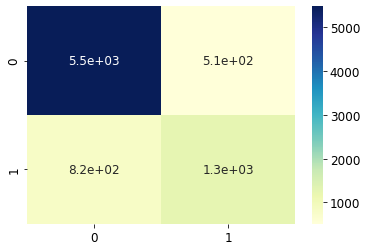

In [119]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred_rf_best)
sns.heatmap(cm, annot=True,cmap='YlGnBu')

In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      5990
           1       0.71      0.61      0.65      2082

    accuracy                           0.83      8072
   macro avg       0.79      0.76      0.77      8072
weighted avg       0.83      0.83      0.83      8072



In [69]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [70]:
gnby_pred=gnb.predict(x_test)
gnby_pred

array([1, 0, 0, ..., 0, 0, 0])

In [71]:
accuracy_score(y_test,gnby_pred)

0.7874132804757186

In [72]:
recall_score(y_test,rf_y_pred)

0.6061479346781941

In [73]:
print('Train data score{:.4f}'.format(gnb.score(x_train,y_train)))

Train data score0.7890


In [74]:
y_test.value_counts()

0    5990
1    2082
Name: salary, dtype: int64

In [75]:
#Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


Confusion matrix

 [[5631  359]
 [1194  888]]

True Positives(TP) =  5631

True Negatives(TN) =  888

False Positives(FP) =  359

False Negatives(FN) =  1194


<AxesSubplot:>

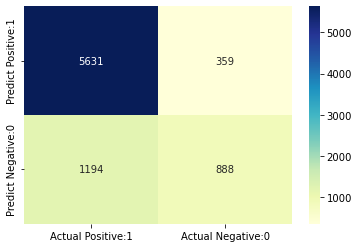

In [76]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      5990
           1       0.71      0.43      0.53      2082

    accuracy                           0.81      8072
   macro avg       0.77      0.68      0.71      8072
weighted avg       0.80      0.81      0.79      8072



In [78]:
TP=cm[0,0]
TN=cm[1,1]
FP=cm[0,1]
FN=cm[1,0]

In [79]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1924


In [80]:
#PRECISION
pr=TP/float(TP+FP)
print("PRECISION :{0:0.4f}".format(pr))

PRECISION :0.9401


In [81]:
#RECALL
recall=TP/float(TP+FN)
print("RECALL:{0:0.4f}".format(recall))

RECALL:0.8251


In [82]:
#TRUE POSITIVE
true_positive_rate=TP/float(TP+FN)
print("TRUE POSITIVE RATE :{0:0.4f}".format(true_positive_rate))


TRUE POSITIVE RATE :0.8251


In [83]:
#FALSE POSITIVE
false_positive_rate=FP/float(TP+TN)
print("FALSE POSITIVE RATE :{0:0.4f}".format(false_positive_rate))

FALSE POSITIVE RATE :0.0551


In [84]:
#SPECIFICITY
specificity=TN/(TN+FP)
print("SPECIFICITY:{0:0.4f}".format(specificity))

SPECIFICITY:0.7121


In [85]:
#CALCULATE PROBABILITY
y_pred_prob=gnb.predict_proba(x_test)[0:10]
y_pred_prob

array([[8.84966643e-16, 1.00000000e+00],
       [9.99219739e-01, 7.80261291e-04],
       [8.40080912e-01, 1.59919088e-01],
       [9.12301565e-01, 8.76984353e-02],
       [9.49559024e-03, 9.90504410e-01],
       [9.98454667e-01, 1.54533255e-03],
       [9.97298787e-01, 2.70121301e-03],
       [7.86524336e-14, 1.00000000e+00],
       [7.44916901e-01, 2.55083099e-01],
       [8.30690347e-01, 1.69309653e-01]])

In [86]:
#store probability in dataframe
y_pred_prob_df=pd.DataFrame(data=y_pred_prob,columns=['Prob of - <=50K','Prob of ->50K'])
y_pred_prob_df

,Prob of - <=50K,Prob of ->50K
0,8.849666e-16,1.000000
1,9.992197e-01,0.000780
2,8.400809e-01,0.159919
3,9.123016e-01,0.087698
4,9.495590e-03,0.990504
5,9.984547e-01,0.001545
6,9.972988e-01,0.002701
7,7.865243e-14,1.000000
8,7.449169e-01,0.255083
9,8.306903e-01,0.169310


In [87]:
gnb.predict_proba(x_test)[0:10,1]

array([1.00000000e+00, 7.80261291e-04, 1.59919088e-01, 8.76984353e-02,
       9.90504410e-01, 1.54533255e-03, 2.70121301e-03, 1.00000000e+00,
       2.55083099e-01, 1.69309653e-01])

In [88]:
y_pred1=gnb.predict_proba(x_test)[:,1]

Text(0, 0.5, 'Frequency')

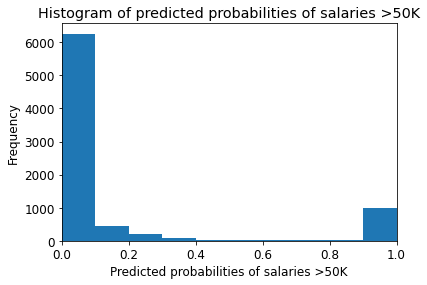

In [89]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

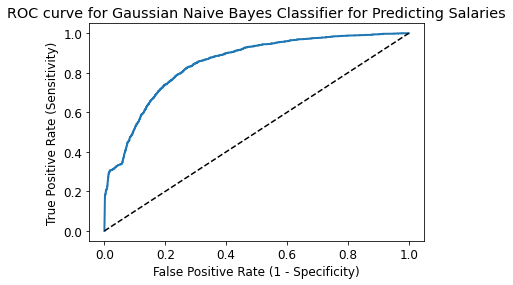

In [90]:
#ROC_AUC
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, )

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [91]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8483


In [92]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, x_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8451


In [93]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, x_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.78980892 0.80732484 0.78438662 0.78013808 0.78120021 0.79341476
 0.7928837  0.77854488 0.79341476 0.78544875]


In [94]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7887


In [95]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 40, stop = 150, num = 15)]
max_depth = [int(x) for x in np.linspace(40, 150, num = 15)]
param_dist = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
}
rf_tuned = RandomForestClassifier(random_state = 42)
rf_cv = RandomizedSearchCV(estimator = rf_tuned, param_distributions = param_dist, cv = 5, random_state = 42)
rf_cv.fit(x_train, y_train)
rf_cv.best_score_

0.8344832933681701